In [36]:
pip install node2vec


In [37]:
!pip install ipywidgets


In [38]:
pip install gradio


In [39]:
import pandas as pd
import networkx as nx
import numpy as np
from node2vec import Node2Vec
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from sklearn.ensemble import RandomForestClassifier
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
import ipywidgets as widgets
from IPython.display import display
import gradio as gr
from gensim.models import Word2Vec
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score


# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset_17972.csv", encoding= 'utf-8')  # Replace "your_dataset.csv" with the actual file path
df.head(20)



,Source,Date,Category,Title,Statement,Class
0,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",Fake
1,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",Fake
2,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,Fake
3,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,Fake
4,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",Fake
5,channeldhaka.news,2018-12-24T18:17:50+00:00,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,Fake
6,earki.com,2019-03-14T02:33:32+00:00,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",Fake
7,motikontho.wordpress.com,2011-06-19T07:12:21+00:00,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,Fake
8,bengaliviralnews.com,2018-01-03T17:21:14+00:00,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,Fake
9,motikontho.wordpress.com,2015-02-22T14:45:30+00:00,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,Fake


In [40]:

df = df.drop(['Title','Date'], axis=1)
df.head(5)


,Source,Category,Statement,Class
0,channeldhaka.news,International,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",Fake
1,earki.com,Miscellaneous,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",Fake
2,earki.com,Miscellaneous,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,Fake
3,channeldhaka.news,Sports,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,Fake
4,motikontho.wordpress.com,Miscellaneous,"নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",Fake


In [41]:
df['Category'].value_counts()
df['Class'].unique()

array(['Fake', 'Real'], dtype=object)

In [42]:
df['Class'] = df['Class'].astype('category').cat.codes
df['Class'].value_counts()

1    14707
0     3264
Name: Class, dtype: int64

In [43]:
df.head()

,Source,Category,Statement,Class
0,channeldhaka.news,International,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0
1,earki.com,Miscellaneous,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0
2,earki.com,Miscellaneous,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0
3,channeldhaka.news,Sports,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0
4,motikontho.wordpress.com,Miscellaneous,"নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0


In [44]:
df.isnull().sum()

Source       0
Category     0
Statement    0
Class        0
dtype: int64

In [45]:
dup = df[df.duplicated(['Statement'])]
print(dup.shape)
print(df.shape)

(1041, 4)
(17971, 4)


In [46]:

df = df.drop_duplicates(['Statement'])
print(df.shape)

(16930, 4)


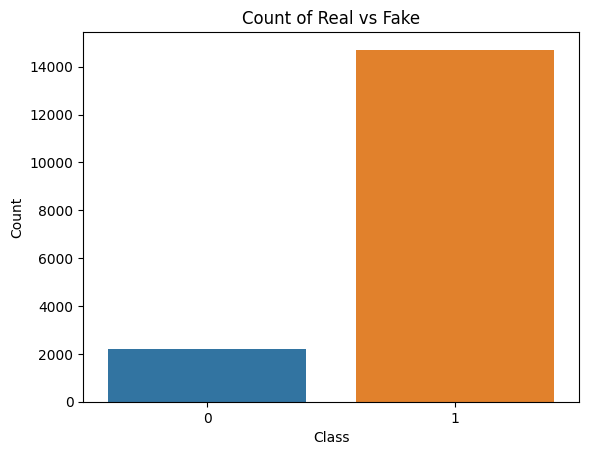

In [47]:
sns.countplot(x='Class', data=df)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Real vs Fake')
plt.show()

In [48]:
# Group the data by Category and calculate the count and percentage of fake and real news
category_counts = df.groupby('Category')['Class'].value_counts().unstack()
category_counts['Total'] = category_counts.sum(axis=1)
category_counts['Fake %'] = (category_counts[0] / category_counts['Total']) * 100
category_counts['Real %'] = (category_counts[1] / category_counts['Total']) * 100

# Display the result
print(category_counts)


Class                                  0       1   Total      Fake %  \
Category                                                               
Crime                               42.0   310.0   352.0   11.931818   
Editorial                            NaN  1050.0  1050.0         NaN   
Education                           30.0   330.0   360.0    8.333333   
Entertainment                      106.0   783.0   889.0   11.923510   
Finance                              2.0   378.0   380.0    0.526316   
International                       91.0  2166.0  2257.0    4.031901   
Lifestyle                          102.0   280.0   382.0   26.701571   
Miscellaneous                      654.0   696.0  1350.0   48.444444   
National                            99.0  5610.0  5709.0    1.734104   
Politics                            90.0   886.0   976.0    9.221311   
Sports                              54.0  1959.0  2013.0    2.682563   
Technology                          29.0   259.0   288.0   10.06

In [49]:
source_counts = df.groupby('Source')['Class'].value_counts().unstack()
source_counts['Total'] = source_counts.sum(axis=1)
source_counts['Fake %'] = (source_counts[0] / source_counts['Total']) * 100
source_counts['Real %'] = (source_counts[1] / source_counts['Total']) * 100

# Display the result
print(source_counts)

Class                    0      1  Total  Fake %  Real %
Source                                                  
Prothombarta.news      1.0    NaN    1.0   100.0     NaN
The Report24.com       1.0    NaN    1.0   100.0     NaN
agooannews.com         1.0    NaN    1.0   100.0     NaN
alokitobangladesh.com  2.0    NaN    2.0   100.0     NaN
aparadhchokh24bd.com   2.0    NaN    2.0   100.0     NaN
...                    ...    ...    ...     ...     ...
somoynews.tv           NaN  797.0  797.0     NaN   100.0
sonalinews.com         1.0    NaN    1.0   100.0     NaN
sylhetprotidin24.com   1.0    NaN    1.0   100.0     NaN
sylhettoday24.news     2.0    NaN    2.0   100.0     NaN
timesbangla.in         1.0    NaN    1.0   100.0     NaN

[93 rows x 5 columns]


In [50]:
# Extract domain feature from the URL and assign it to the "Source" column
#df['Source'] = df['Source'].apply(lambda url: urlparse(url).netloc)



In [51]:
# Example output
print(df['Source'].head())

0           channeldhaka.news
1                   earki.com
2                   earki.com
3           channeldhaka.news
4    motikontho.wordpress.com
Name: Source, dtype: object


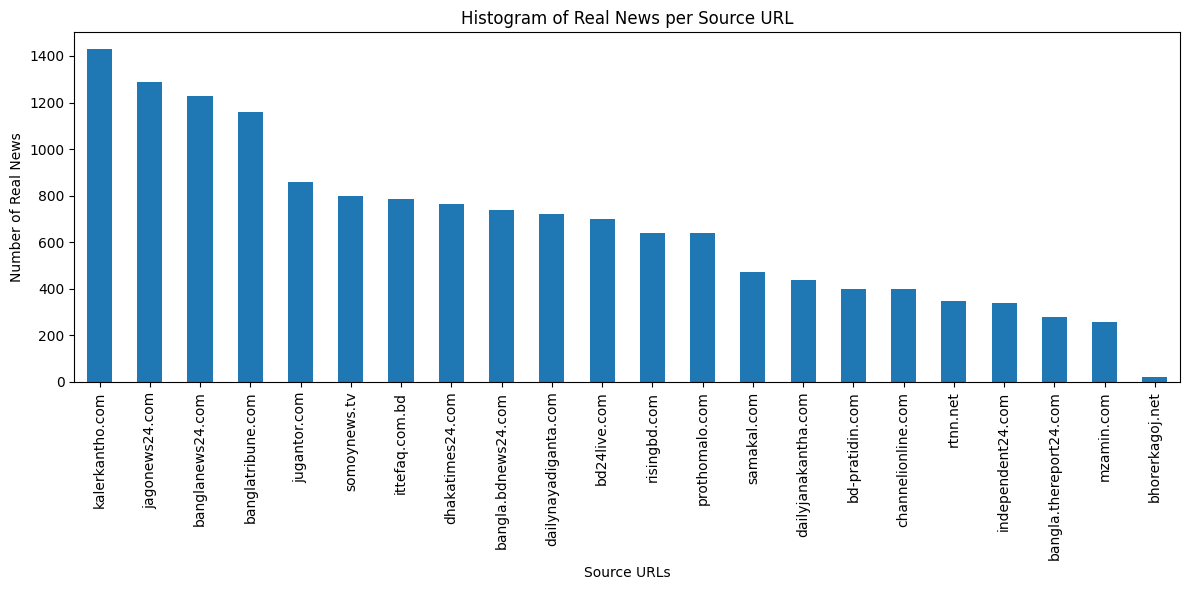

In [52]:
# Filter the DataFrame to include only real news
real_news = df[df["Class"] == 1]

# Count the occurrences of each unique source URL for real news
url_counts = real_news["Source"].value_counts()

# Reset the index and create a new DataFrame
url_counts_df = url_counts.reset_index()
url_counts_df.columns = ["Source", "Count"]

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(url_counts_df["Source"], bins=993, rwidth=0.9)
url_counts.plot(kind="bar")
plt.xlabel("Source URLs")
plt.ylabel("Number of Real News")
plt.title("Histogram of Real News per Source URL")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

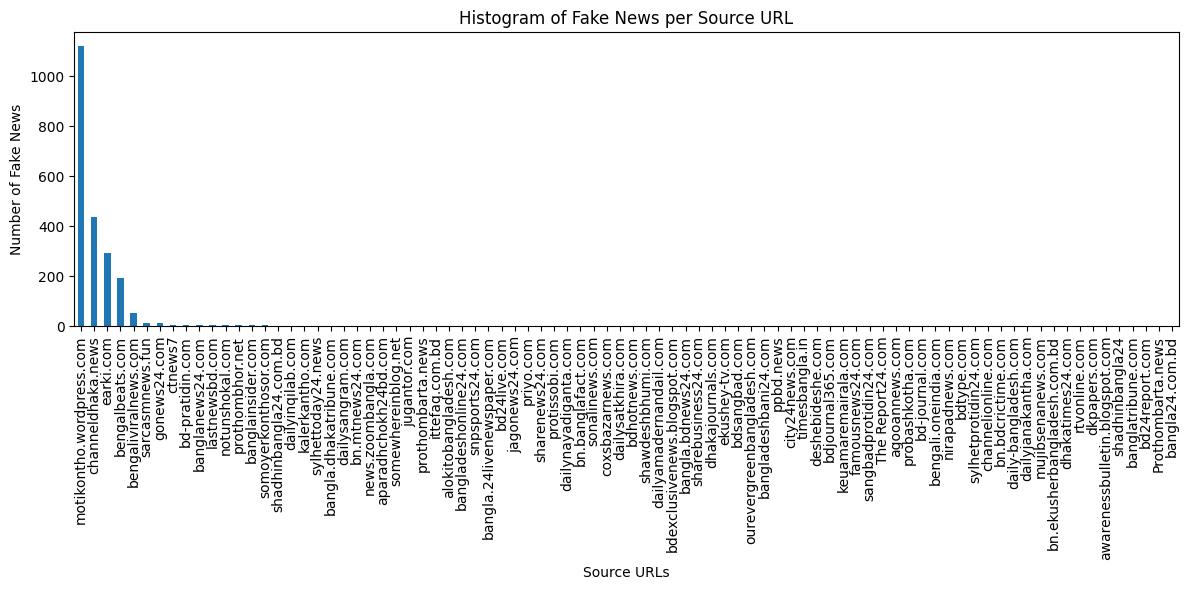

In [53]:
# Filter the DataFrame to include only real news
fake_news = df[df["Class"] == 0]

# Count the occurrences of each unique source URL for real news
url_counts = fake_news["Source"].value_counts()

# Reset the index and create a new DataFrame
url_counts_df = url_counts.reset_index()
url_counts_df.columns = ["Source", "Count"]

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(url_counts_df["Source"], bins=993, rwidth=0.9)
url_counts.plot(kind="bar")
plt.xlabel("Source URLs")
plt.ylabel("Number of Fake News")
plt.title("Histogram of Fake News per Source URL")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

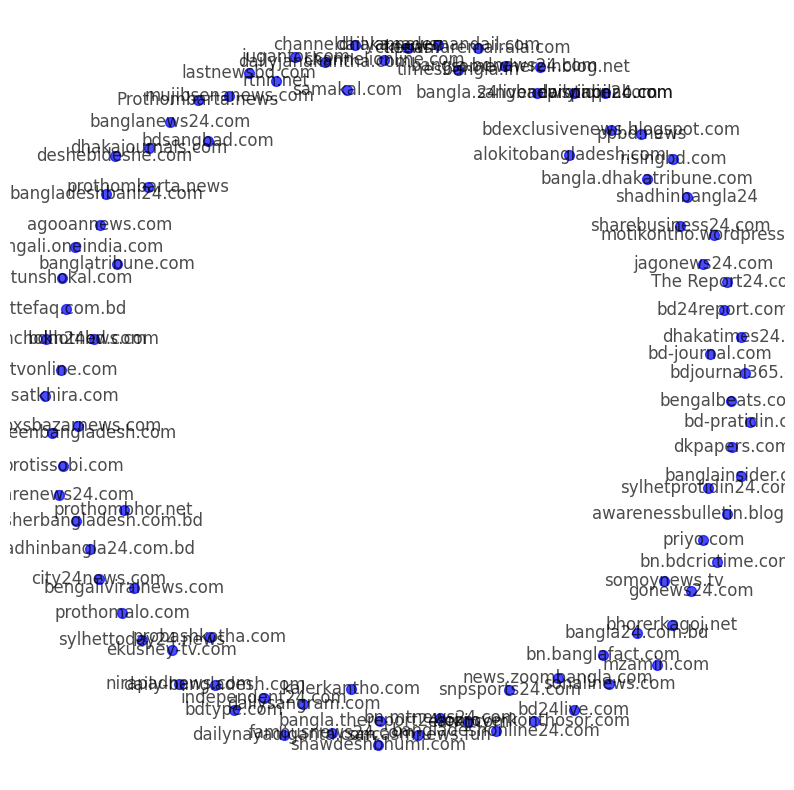

In [54]:
# Create the web graph
web_graph = nx.Graph()
for source in df["Source"]:
    web_graph.add_node(source)

 # Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10), facecolor='black')

# Plot the web graph
pos = nx.spring_layout(web_graph)  # Define the layout algorithm
nx.draw(web_graph, pos, with_labels=True, node_size=50, node_color='blue', edge_color='red', alpha=0.7, ax=ax)

# Show the plot
plt.show()



In [55]:
# Generate node embeddings
node2vec = Node2Vec(web_graph, dimensions=128, walk_length=30, num_walks=200)
nmodel = node2vec.fit(window=10, min_count=1)
# Save the node2vec model using its built-in save method
#node2vec_model_path = "/F:/thesis/Saved Models/node2vec_model.model"
#model.save(node2vec_model_path)

Computing transition probabilities:   0%|          | 0/93 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 200/200 [00:00<00:00, 4192.75it/s]


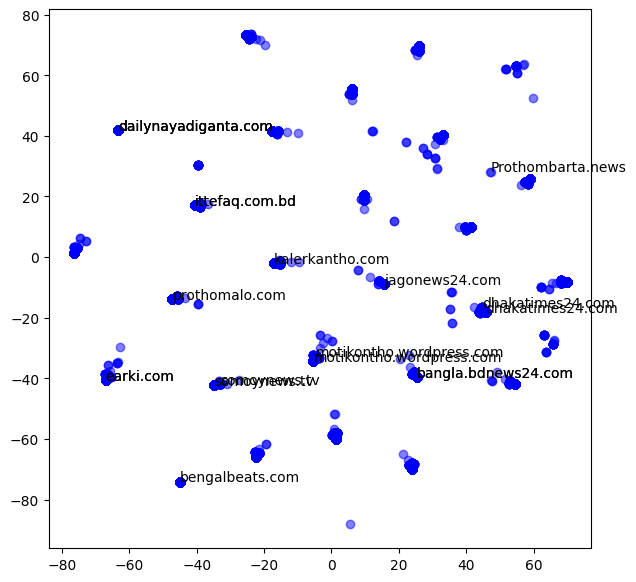

In [56]:

# Extract features from the URLs
features = []
for source in df["Source"]:
    features.append(nmodel.wv[source])
    # Convert the features to a NumPy array
features_array = np.array(features)

# Use t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
embedding_2d = tsne.fit_transform(features_array)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Create a figure and axis for t-SNE visualization
fig, ax = plt.subplots(figsize=(7, 7))

# Plot the node embeddings with reduced transparency (alpha)
ax.scatter(embedding_2d[:, 0], embedding_2d[:, 1], c='blue', alpha=0.5)

# Annotate a random subset of points with the URLs
num_points_to_annotate = min(len(df["Source"]), 20)  # You can change the number of points to annotate
annotated_points = np.random.choice(len(df["Source"]), num_points_to_annotate, replace=False)

for i in annotated_points:
    ax.annotate(df["Source"][i], (embedding_2d[i, 0], embedding_2d[i, 1]), color='black')

# Show the t-SNE plot
plt.show()



In [57]:
for i in range(5):  # Change the number as per your requirement
    print(f"URL: {df['Source'][i]}")
    print(f"Features: {features[i]}")
    print()
#df.head(5)

URL: channeldhaka.news
Features: [ 6.7853043e-03 -2.4736626e-03 -2.7070399e-03  2.8248942e-03
  1.6569030e-03  5.6565106e-03 -4.7740340e-03  6.1380323e-03
 -6.4151213e-03 -3.6843168e-03 -5.6329072e-03  6.0965680e-03
  1.6154051e-03  6.6115921e-03  5.8768755e-03 -6.2902737e-04
 -6.8320911e-03 -1.1230744e-03 -5.1925741e-03 -1.8341029e-03
  2.7423166e-04  2.6084203e-03 -5.6999279e-03  7.4977288e-03
  6.8421522e-03  3.2237014e-03  7.4418047e-03  1.8875673e-04
  5.4438682e-03 -3.2004667e-03 -8.5515529e-04  6.8964120e-03
 -2.5109304e-03  1.7879969e-03  5.1362496e-03  5.5304840e-03
 -7.4570477e-03  7.9674926e-04 -3.9911363e-03 -3.5986919e-03
 -2.2443002e-03  4.6874583e-03 -3.9210329e-03  7.4049467e-03
 -3.4217080e-03 -2.1569077e-03  2.8071823e-03  4.4258516e-03
 -7.0494413e-03 -1.8799827e-03  4.3034088e-03  4.6955999e-03
 -5.6105200e-03 -4.7062868e-03  2.3468677e-03  3.4940019e-03
 -6.5474808e-03  6.5581910e-03  7.0662359e-03 -2.6772870e-03
 -5.5934368e-03 -7.2312187e-03 -2.9133167e-03  6.873

In [58]:
# Prepare the data for classification
X = pd.DataFrame(features)
y = df["Class"]  # Assuming the Class field contains the labels (real or fake)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(X_train, y_train , random_state=4,test_size=0.12)

print(X_train.shape)  # 80% Train set
print(X_test.shape)

(13544, 128)
(3386, 128)


In [59]:
C_list = [0.1, 1, 10, 100]
gamma_list = [0.001, 0.01, 0.1, 1]



best_acc = -np.inf

for C in C_list:
  for gamma in gamma_list:
    svm_test = SVC(C=C, gamma=gamma)
    svm_test.fit(x_val_train, y_val_train)
    predictions = svm_test.predict(x_val_test)
    acc = accuracy_score(y_val_test, predictions)
    if acc > best_acc:
      best_acc = acc
      best_C = C
      best_gamma = gamma

print(best_acc)
print(best_C)
print(best_gamma)

0.9969249692496925
100
1


In [60]:
# Train and evaluate the SVM classifier
svm = SVC(C=best_C, kernel='linear', gamma=best_gamma)
svm.fit(X_train, y_train)

SVC(C=100, gamma=1, kernel='linear')

In [61]:
#import joblib
#svm = SVC()
#svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
t_pred = svm.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, t_pred)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Test Accuracy:", svm_accuracy)
print("SVM Train Accuracy:", svm_train_accuracy)

ms_pre = precision_score(y_test, svm_predictions)
print("Precision :", ms_pre)

ms_rec = recall_score(y_test, svm_predictions)
print("Recall :", ms_rec)

ms_f3 = f1_score(y_test, svm_predictions)
print("F1 :", ms_f3)

# Save SVM model
#svm_model_path = "/F:/thesis/Saved Models/svm_model.pkl"
#joblib.dump(svm, svm_model_path)

SVM Test Accuracy: 0.9964559952746603
SVM Train Accuracy: 0.9973419964559953
Precision : 0.9959541469993257
Recall : 1.0
F1 : 0.9979729729729729


In [62]:
# Train and evaluate the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
lr_train_pred = logistic_regression.predict(X_train)
lr_predictions = logistic_regression.predict(X_test)
lr_train_accuracy = accuracy_score(y_train, lr_train_pred)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Test Accuracy:", lr_accuracy)
print("Logistic Regression Train Accuracy:", lr_train_accuracy)

lr_pre = precision_score(y_test, lr_predictions)
print("Precision :", lr_pre)

lr_rec = recall_score(y_test, lr_predictions)
print("Recall :", lr_rec)

lr_f3 = f1_score(y_test, lr_predictions)
print("F1 :", lr_f3)


Logistic Regression Test Accuracy: 0.8724158298877732
Logistic Regression Train Accuracy: 0.867764323685765
Precision : 0.8724158298877732
Recall : 1.0
F1 : 0.9318611987381703


In [63]:

# Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate the model
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)



print("Logistic Regression Train Accuracy:", train_accuracy)
print("Logistic Regression Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Save Logistic Regression model
#logreg_model_path = "/F:/thesis/Saved Models/logreg_model.pkl"
#joblib.dump(best_model, logreg_model_path)


Logistic Regression Train Accuracy: 0.9888511518015357
Logistic Regression Test Accuracy: 0.9899586532782044
Precision: 0.9886211512717537
Recall: 1.0
F1-score: 0.9942780208683946


In [64]:
# Train and evaluate ANN classifier
ann = MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", random_state=42)
ann.fit(X_train, y_train)
ann_predictions = ann.predict(X_test)
ann_train_pred = ann.predict(X_train)
ann_accuracy = accuracy_score(y_test, ann_predictions)
ann_train_accuracy = accuracy_score(y_train, ann_train_pred)
ann_precision = precision_score(y_test, ann_predictions)
ann_recall = recall_score(y_test, ann_predictions)
ann_f1 = f1_score(y_test, ann_predictions)

print("ANN Results:")
print("Accuracy:", ann_accuracy)
print("Train Accuracy:", ann_train_accuracy)
print("Precision:", ann_precision)
print("Recall:", ann_recall)
print("F1-score:", ann_f1)

ANN Results:
Accuracy: 0.997637330183107
Train Accuracy: 0.9989663319551093
Precision: 0.9972991222147198
Recall: 1.0
F1-score: 0.9986477349560514


In [65]:
# Define the CNN model architecture
model = Sequential()
model.add(Embedding(input_dim=X.shape[0], output_dim=X.shape[1], input_length=X.shape[1]))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

 #Evaluate the CNN model
cnn_probabilities = model.predict(X_test).flatten()
cnn_predictions = np.where(cnn_probabilities >= 0.3, 1, 0)
cnn_accuracy = accuracy_score(y_test, cnn_predictions)
cnn_train_probabilities = model.predict(X_train).flatten()
cnn_train_predictions = np.where(cnn_train_probabilities >= 0.3, 1, 0)
cnn_train_accuracy = accuracy_score(y_train, cnn_train_predictions)
cnn_precision = precision_score(y_test, cnn_predictions)
cnn_recall = recall_score(y_test, cnn_predictions)
cnn_f1 = f1_score(y_test, cnn_predictions)

print("CNN Results:")
print("Accuracy:", cnn_accuracy)
print("Train Accuracy:", cnn_train_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1-score:", cnn_f1)

# Save CNN model
#cnn_model_path = "/F:/thesis/Saved Models/cnn_model.pkl"
#joblib.dump(model, cnn_model_path)


424/424 [==============================] - 13s 30ms/step
CNN Results:
Accuracy: 0.8724158298877732
Train Accuracy: 0.867764323685765
Precision: 0.8724158298877732
Recall: 1.0
F1-score: 0.9318611987381703


In [66]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf_classifier.predict(X_test)
train_predictions = rf_classifier.predict(X_train)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy:", train_accuracy)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9979326639102185
Train Accuracy: 0.9989663319551093
Precision: 0.9976359338061466
Recall: 1.0
F1 Score: 0.9988165680473373


In [67]:

def predict_fake_news(source_url):
    try:
        # Extract features for the input source URL using node2vec model
        input_feature = nmodel.wv[source_url]

        # Perform predictions using your models
        # Replace with your prediction code for SVM, CNN, and Logistic Regression
        svm_prediction = svm.predict([input_feature])[0]  # Ensure you provide a list of features

        cnn_probabilities = model.predict(np.array([input_feature])).flatten()
        cnn_prediction = int(np.where(cnn_probabilities >= 0.3, 1, 0))

        lr_prediction = best_model.predict([input_feature])[0]  # Ensure you provide a list of features

        combined_prediction = int((svm_prediction + lr_prediction + cnn_prediction) >= 2)

        return "Real" if combined_prediction == 1 else "Fake"

    except Exception as e:
        print("An error occurred:", e)
        return "Error"

while True:
    source_url = input("Enter Source URL (or 'exit' to stop): ")
    if source_url.lower() == "exit":
        break
    prediction = predict_fake_news(source_url)
    print("Combined Prediction:", prediction)



Enter Source URL (or 'exit' to stop): prothomalo.com
1/1 [==============================] - 0s 42ms/step
Combined Prediction: Real
Enter Source URL (or 'exit' to stop): earki.com
1/1 [==============================] - 0s 25ms/step
Combined Prediction: Fake
Enter Source URL (or 'exit' to stop): exit
